<a href="https://colab.research.google.com/github/MithileshKrishnaS/Signature-Verification/blob/main/cnn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set= train_datagen.flow_from_directory(directory= '/content/drive/MyDrive/research/noiseless/train',
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=10,
                                               class_mode='categorical'  
                                               )
test_set= test_datagen.flow_from_directory(directory= '/content/drive/MyDrive/research/noiseless/train',
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=5,
                                               class_mode='categorical' 
                                          )

Found 410 images belonging to 10 classes.
Found 410 images belonging to 10 classes.


In [ ]:
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(10, activation='softmax'))
cnn3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [ ]:
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [ ]:
r = cnn3.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=40,
  validation_steps=20
)

Epoch 1/10
40/40 [==============================] - 9s 118ms/step - loss: 2.5630 - accuracy: 0.5075 - val_loss: 0.4389 - val_accuracy: 0.8000
Epoch 2/10
40/40 [==============================] - 5s 115ms/step - loss: 1.2448 - accuracy: 0.5725 - val_loss: 0.4928 - val_accuracy: 0.8200
Epoch 3/10
40/40 [==============================] - 5s 114ms/step - loss: 1.0837 - accuracy: 0.6525 - val_loss: 0.6952 - val_accuracy: 0.8100
Epoch 4/10
40/40 [==============================] - 5s 114ms/step - loss: 0.9751 - accuracy: 0.6800 - val_loss: 0.3010 - val_accuracy: 0.9200
Epoch 5/10
40/40 [==============================] - 5s 114ms/step - loss: 1.0382 - accuracy: 0.6850 - val_loss: 0.3169 - val_accuracy: 0.8700
Epoch 6/10
40/40 [==============================] - 5s 113ms/step - loss: 0.7958 - accuracy: 0.7375 - val_loss: 0.4814 - val_accuracy: 0.8700
Epoch 7/10
40/40 [==============================] - 5s 112ms/step - loss: 0.8419 - accuracy: 0.7150 - val_loss: 0.3163 - val_accuracy: 0.8700
Epoch 

In [ ]:
cnn3.save("/content/drive/MyDrive/research/Model/cnn3.h5")

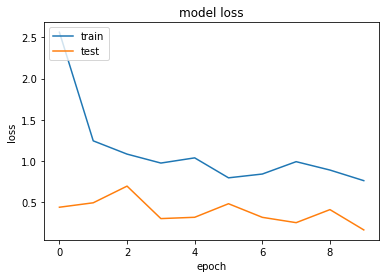

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss.png')
plt.show()

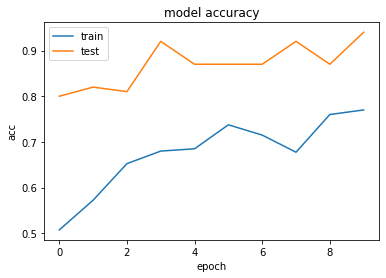

In [ ]:
# Accuracy plotting
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()

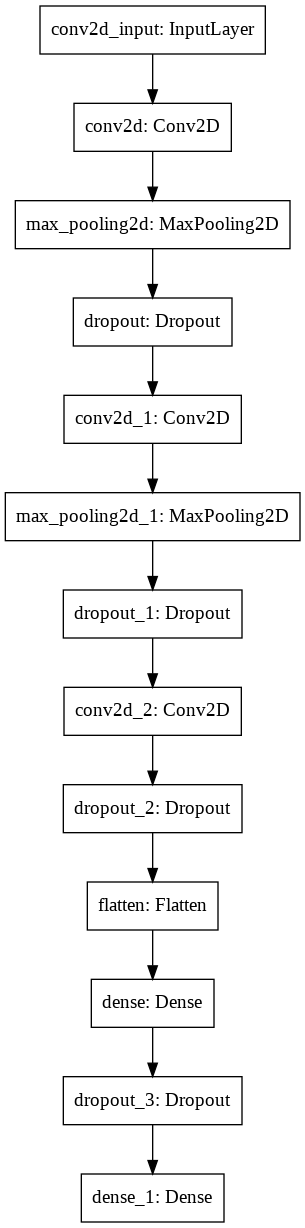

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(cnn3, to_file='classifier.png')